In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stock_returns = pd.read_csv("../../Data/StockReturns.csv")
mpt_weights = pd.read_csv("../../Data/MPT_weights.csv")

<h2> Benchmark weight distribution </h2>

Text(0.5, 1.0, 'Security weights, MPT, test')

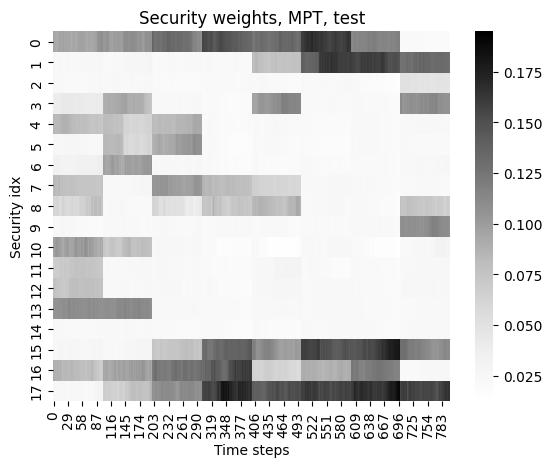

In [3]:
sns.heatmap(mpt_weights.T, cmap="Greys", )
plt.xlabel("Time steps")
plt.ylabel("Security idx")
plt.title("Security weights, MPT, test")

<h2> Cumulative benchmark return (line plot) </h2>

In [4]:
day_ret = [np.dot(mpt_weights.iloc[i], stock_returns.iloc[-800+(-1)+i]+1) for i in range(800)]
cum_ret = np.cumprod(day_ret)

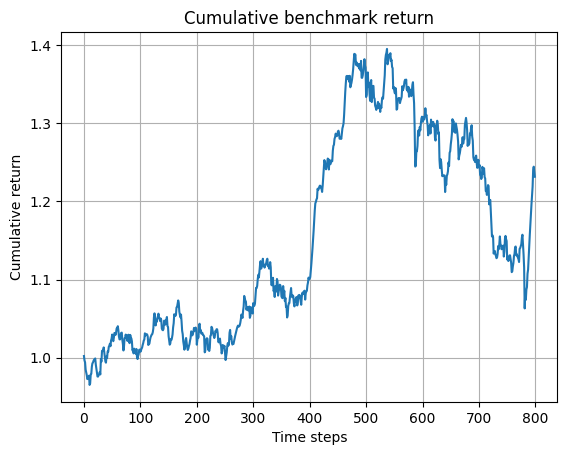

In [5]:
fig, ax = plt.subplots()
ax.plot(cum_ret)
ax.set_xlabel("Time steps")
ax.set_ylabel("Cumulative return")
plt.title("Cumulative benchmark return")
plt.grid()
plt.show()

<h2> Financial indicators on benchmark </h2>

In [6]:
from analysis_function import (
    _calculate_return,
    _calculate_volatility,
    _calculate_maxdrawdown,
    _calculate_var,
    _calculate_cvar,
    _calculate_sharpe,
    _calculate_sortino,
    _calculate_sterling,
    _calculate_calmar
)

<h3> Risk-Adjusted Returns </h3>

In [7]:
print("Sharpe ", _calculate_sharpe(day_ret,0))
print("Sortino ", _calculate_sortino(day_ret,0))
print("Sterling ", _calculate_sterling(day_ret))
print("Calmar ", _calculate_calmar(day_ret))

Sharpe  0.907
Sortino  1.118
Sterling  4.048
Calmar  0.611


<h3> Return and Risks </h3>

In [10]:
print("P/L (%): ",np.round(_calculate_return(day_ret),2))
print("Vol (x10*5): ",np.round(_calculate_volatility(np.array(day_ret)),2))
print("MDD: ", _calculate_maxdrawdown(day_ret))
print("VaR: ",_calculate_var(day_ret))
print("CVaR: ", _calculate_cvar(day_ret))

P/L (%):  23.17
Vol (x10*5):  70.21
MDD:  -0.238
VaR:  -0.0165
CVaR:  -0.0229
